In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Load your dataset
data = pd.read_csv('filtered_data.csv')

In [14]:
# Assuming you've already obtained the correlation matrix
correlation_matrix = data.corr()

# Extract the dependent variable column name
target_column = 'property_value'

# Extract the names of all columns
all_columns = data.columns

# Remove the dependent variable column from the list of columns
independent_cols = [col for col in all_columns if col != target_column]

# Extract the correlation coefficients for the independent variables
correlation_values = correlation_matrix.loc[independent_cols, target_column]

# Convert the correlation values to a numpy array
correlation_array = correlation_values.values

print(correlation_array)

[0.97366176 0.96416301 0.91215516 0.68652549 0.40484269 0.45986
 0.54336314 0.56967313 0.53009008 0.31784242]


In [15]:
class LinearRegression:
    def __init__(self):
        self.coefficients = None
    
    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Calculate the coefficients using the normal equation
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def predict(self, X):
        # Add a column of ones to X for the intercept term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Calculate the predictions
        predictions = X @ self.coefficients
        return predictions


In [16]:
# Extract the independent variables (features) and the dependent variable (target)
X = data.drop(columns=['property_value'])  # Independent variables
y = data['property_value']                 # Dependent variable

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Create an instance of the LinearRegression class
model = LinearRegression()


In [19]:
# Fit the model to the training data
model.fit(X_train.to_numpy(), y_train.to_numpy())  # Convert DataFrame to numpy array


In [21]:
# Make predictions on the testing data
predictions = model.predict(X_test.to_numpy())  # Convert DataFrame to numpy array

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing data
predictions = model.predict(X_test.to_numpy())  # Convert DataFrame to numpy array

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 255116761.80976158
R-squared (R2) Score: 0.9681493994195787


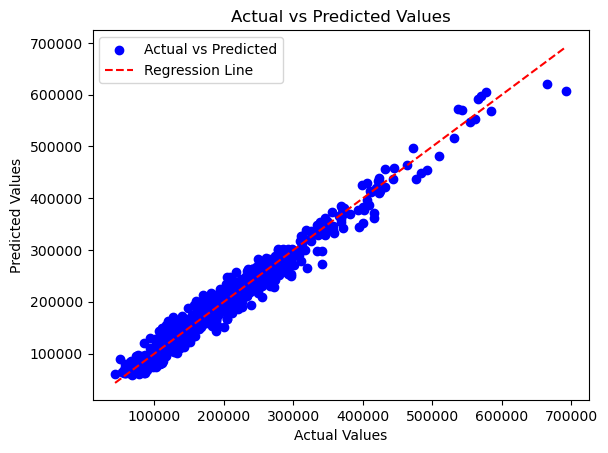

In [25]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted')

# Plot the regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Regression Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
# Save the plot as an image file
plt.savefig('actual_vs_predicted_manual.png')

plt.show()